In [39]:
# Magic command to show plots in notebook
%matplotlib inline

# Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

print("✅ Libraries imported and setup complete")



✅ Libraries imported and setup complete


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Load CSV without header (your dataset has no proper headers)
df = pd.read_csv("twitter_training.csv", header=None)

# Show first 5 rows
df.head()




,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [41]:
# Correct column names based on dataset structure
df.columns = ['id', 'topic', 'sentiment', 'text']

# Show first 5 rows
df.head()



,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [43]:
# Function to clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"[^a-z\s]", "", text) # remove numbers/punctuation
    return text

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Show first 5 cleaned texts
df[['text','clean_text']].head()


,text,clean_text
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [44]:
# Function to get sentiment
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply to cleaned text
df['predicted_sentiment'] = df['clean_text'].apply(get_sentiment)

# Show predictions
df[['clean_text','predicted_sentiment']].head()


,clean_text,predicted_sentiment
0,im getting on borderlands and i will murder yo...,Neutral
1,i am coming to the borders and i will kill you...,Neutral
2,im getting on borderlands and i will kill you all,Neutral
3,im coming on borderlands and i will murder you...,Neutral
4,im getting on borderlands and i will murder y...,Neutral


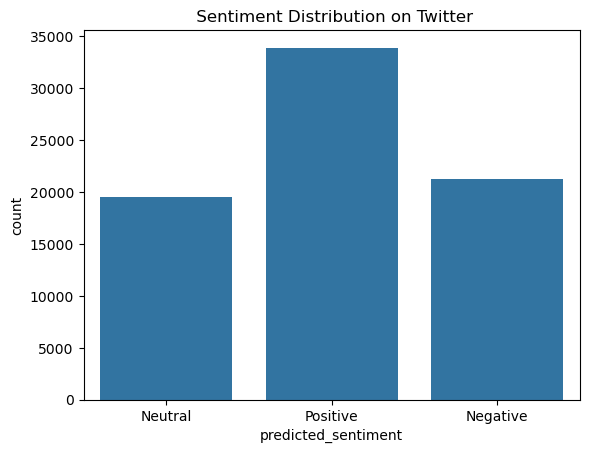

In [65]:
sns.countplot(x='predicted_sentiment', data=df)
plt.title(" Sentiment Distribution on Twitter")
plt.show()



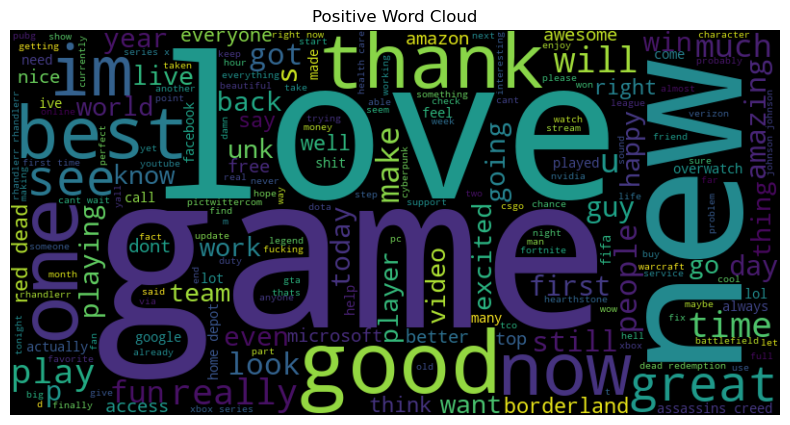

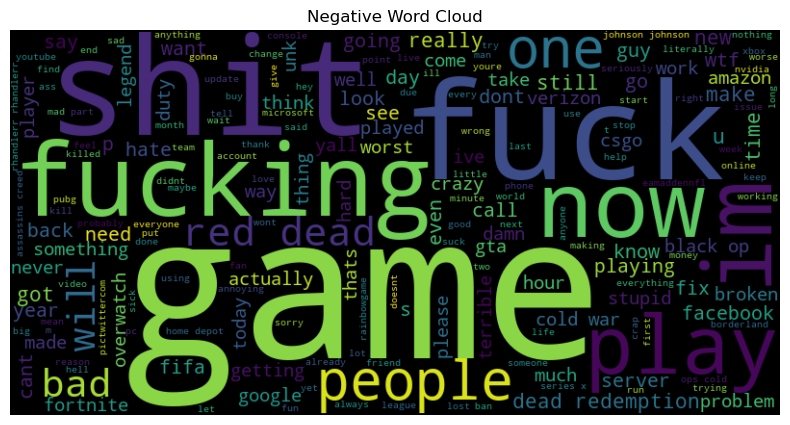

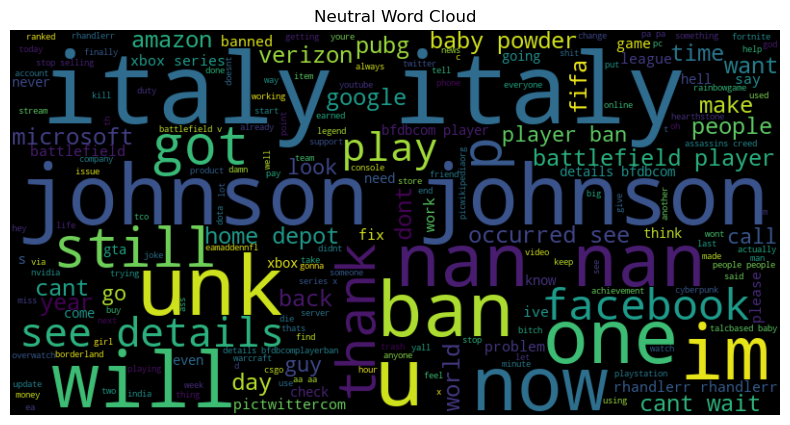

In [67]:
def plot_wordcloud(sentiment_label):
    text = " ".join(df[df['predicted_sentiment']==sentiment_label]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment_label} Word Cloud")
    plt.show()

plot_wordcloud("Positive")
plot_wordcloud("Negative")
plot_wordcloud("Neutral")


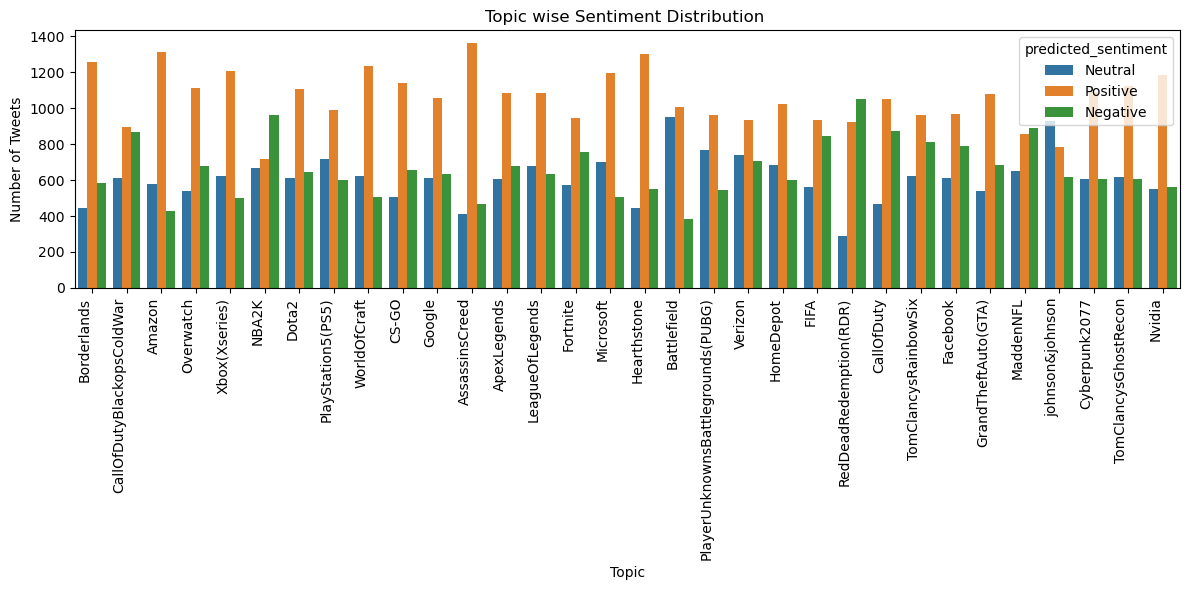

In [57]:
plt.figure(figsize=(12,6))

# Get topics in the order they appear in the dataset
topic_order = df['topic'].unique()

sns.countplot(
    x='topic', 
    hue='predicted_sentiment', 
    data=df, 
    order=topic_order
)

plt.xticks(rotation=90, ha='right')
plt.title("Topic wise Sentiment Distribution ")
plt.xlabel("Topic")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()


In [58]:
df.to_csv("sentiment_analysis_results.csv", index=False)
print("✅ Results saved to sentiment_analysis_results.csv")


✅ Results saved to sentiment_analysis_results.csv


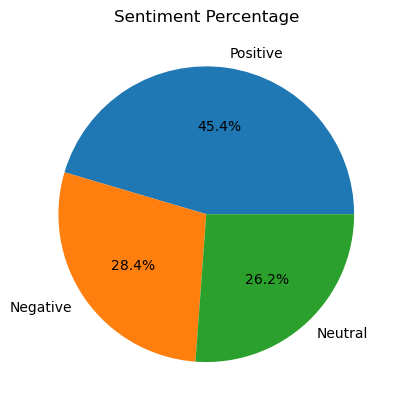

In [64]:
# Count sentiment
sentiment_counts = df['predicted_sentiment'].value_counts()

# Keep only Positive, Negative, Neutral
sentiment_counts = sentiment_counts[['Positive', 'Negative', 'Neutral']]

# Plot pie chart
plt.figure()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")  # remove y-axis label
plt.title("Sentiment Percentage")
plt.show()
